# Cloning #2 - E-BC coupling CHEQ-seq library

David re-did the cloning from scratch. the library was sequenced for E-BC coupling on 10100730. A 3x and 1x cloning condition were done.

Reminder of structure of cloned TWIST enhancer pool:

     15bp adaptor – 11bp BC - 259bp long enhancer - 15 bp adaptors.

- Note that for CHEQ-seq we will thus have 2 BCs:
    - the synthetic designed 11bp BC next to the enhancer (1 mismatch allowed) = sBC
    - the 17bp random BC within the CHEQ-seq vector = rBC
- Adapters:
    - 5' : GAGCATGCACCGGTG
    - 3' : CGCTTCGAGCAGACA
- Total of 2,000 sequences, 300 bp long 
- For amplification of the pool VC2536-2537 were used (a bit longer tail than the adapters above)
- During the linearisation of the CHEQ-seq vector we used newly designed primers (VC2573 (F), VC2574 (R)), since the adapters in the TWIST clones were designed for the STAR-seq plasmid
- For the E-BC sequencing, libraries were prepped with VC2544 (< David) and VC2588 / VC2589 (newly designed)
- Raw data: 
    - */staging/leuven/stg_00002/lcb/ngs_runs/NovaSeq6000_20200730/Demultiplexed*
    - Paired-end: R1 contains sBC + part of enhancer ; R2 contains the rBC
    - We have 2 reads for the low and the high complexity library each

__Copy data__

In [5]:
DIR=/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2

cd $DIR && mkdir -p 00.RAW_FASTQ && cp /staging/leuven/stg_00002/lcb/ngs_runs/NovaSeq6000_20200730/Demultiplexed/*Liesbeth* 00.RAW_FASTQ/ 2> /dev/null 


__Change names of fastqs__

In [6]:
cd 00.RAW_FASTQ
mv CSE__88dc35__amplified_enhancer-barcode_Twist_pool_Liesbeth_3x_S10_R1_001.fastq.gz CSE__88dc35__CHEQseq-cl2_2000enh_3x_R1.fastq.gz 
mv CSE__88dc35__amplified_enhancer-barcode_Twist_pool_Liesbeth_3x_S10_R2_001.fastq.gz CSE__88dc35__CHEQseq-cl2_2000enh_3x_R2.fastq.gz 
mv  CSE__953401__amplified_enhancer-barcode_Twist_pool_Liesbeth_1x_S9_R1_001.fastq.gz CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz 
mv  CSE__953401__amplified_enhancer-barcode_Twist_pool_Liesbeth_1x_S9_R2_001.fastq.gz CSE__953401__CHEQseq-cl2_2000enh_1x_R2.fastq.gz
cd $DIR

# 1. Processing read 1

__Parameters__

In [1]:
#mkdir E-BC_coupling
DIR=/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling
#NAME=CSE__88dc35__CHEQseq-cl2_2000enh_3x
NAME=CSE__953401__CHEQseq-cl2_2000enh_1x

cd $DIR


## 1.0. Fastqc

In [2]:
mkdir 01.FASTQC
module load FastQC/0.11.8-Java-1.8.0

fastqc -t 1 ../00.RAW_FASTQ/${NAME}_R1.fastq.gz -o 01.FASTQC
fastqc -t 1 ../00.RAW_FASTQ/${NAME}_R2.fastq.gz -o 01.FASTQC

mkdir: cannot create directory ‘01.FASTQC’: File exists
Started analysis of CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 5% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 10% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 15% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 20% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 25% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 30% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 35% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 40% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 45% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 50% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 55% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 60% complete for CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz
Approx 65% co

## 1.1. Filter for sequencing qualtiy
We only keep reads that have Q20 for 80% of the bp.


In [3]:
# at least 80% of the NT (-u 20) must have a quality higher then 20 
module load fastp/0.20.0-foss-2018a
mkdir 02.TRIMMED_FQ
fastp --disable_adapter_trimming -q 20 -u 20 -i ../00.RAW_FASTQ/${NAME}_R1.fastq.gz -o 02.TRIMMED_FQ/${NAME}_R1.Q20.fastq.gz

mkdir: cannot create directory ‘02.TRIMMED_FQ’: File exists
Read1 before filtering:
total reads: 16815676
total bases: 823968124
Q20 bases: 812490745(98.6071%)
Q30 bases: 789445512(95.8102%)

Read1 after filtering:
total reads: 16544387
total bases: 810575178
Q20 bases: 802697832(99.0282%)
Q30 bases: 781569218(96.4216%)

Filtering result:
reads passed filter: 16544387
reads failed due to low quality: 271285
reads failed due to too many N: 0
reads failed due to too short: 4

Duplication rate (may be overestimated since this is SE data): 0.812216%

JSON report: fastp.json
HTML report: fastp.html

fastp --disable_adapter_trimming -q 20 -u 20 -i ../00.RAW_FASTQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.fastq.gz -o 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20.fastq.gz 
fastp v0.20.0, time used: 55 seconds


## 1.2. Trim the 5' adapter
Cut with *ATCTAGAGCATGCACCGGTG* (20bp).

The stagger of 1bp should be tolerated normally (Cuadtapt is robust to errors of 10%).




In [4]:
# write only the reads that are trimmed, so that contained the adaptor
module load cutadapt/2.4-foss-2018a-Python-3.7.4

cutadapt -g ATCTAGAGCATGCACCGGTG --trimmed-only \
--output 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5.fastq.gz \
02.TRIMMED_FQ/${NAME}_R1.Q20.fastq.gz

This is cutadapt 2.4 with Python 3.7.4
Command line parameters: -g ATCTAGAGCATGCACCGGTG --trimmed-only --output 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5.fastq.gz 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20.fastq.gz
Processing reads on 1 core in single-end mode ...
[    8<------] 00:03:19    16,544,387 reads  @     12.0 µs/read;   4.99 M reads/minute
Finished in 199.10 s (12 us/read; 4.99 M reads/minute).

=== Summary ===

Total reads processed:              16,544,387
Reads with adapters:                16,536,217 (100.0%)
Reads written (passing filters):    16,536,217 (100.0%)

Total basepairs processed:   810,575,178 bp
Total written (filtered):    479,385,713 bp (59.1%)

=== Adapter 1 ===

Sequence: ATCTAGAGCATGCACCGGTG; Type: regular 5'; Length: 20; Trimmed: 16536217 times.

No. of allowed errors:
0-9 bp: 0; 10-19 bp: 1; 20 bp: 2

Overview of removed sequences
length	count	expect	max.err	error counts
3	7	258506.0	0	7
9	2	63.1	0	2
10	5	15.8	1	4 

In [5]:
# What is the length of the remainder?
zcat  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5.fastq.gz | sed -n '2~4p' | awk '{print length}'  | sort | uniq -c

      8 0
      6 1
     17 10
    976 11
   3046 12
    344 13
    118 14
    399 15
    416 16
    406 17
    435 18
    273 19
      6 2
     82 20
     18 21
     10 22
     25 23
     44 24
     60 25
    139 26
   3200 27
 100638 28
16381982 29
      7 3
  41413 30
   1672 31
    161 32
     79 33
     56 34
     73 35
     15 36
     23 37
      5 39
      6 4
      2 40
      7 46
      5 5
     13 6
     10 7
     16 8
      6 9


## 1.3. Remove empty plasmid reads

cut adapt: with the next part of the vector as 3’ adapter: *CGCTTCGAGCAGACA* (15 bp).

-> the reads that have that 3' adapter or empty plasmid reads and will be kept in a seperate file, the rest (untrimmed reads) will be written to a another file and with this file we will continue to get the enhancer out.

In [6]:
## Find empty plasmids:
    # write the trimmed ones to an output ( = empty vector) ; the untrimmed also to an output (= vector with enhancer)
    # Minimum overlap of 5 is required --overlap

module load cutadapt/2.4-foss-2018a-Python-3.7.4

cutadapt -a CGCTTCGAGCAGACA \
--overlap 5 \
--output 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_emptyVector.fastq.gz \
--untrimmed-output 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full.fastq.gz  \
02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5.fastq.gz

This is cutadapt 2.4 with Python 3.7.4
Command line parameters: -a CGCTTCGAGCAGACA --overlap 5 --output 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_emptyVector.fastq.gz --untrimmed-output 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_full.fastq.gz 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5.fastq.gz
Processing reads on 1 core in single-end mode ...
[ 8=---------] 00:02:20    16,536,217 reads  @      8.5 µs/read;   7.04 M reads/minute
Finished in 140.93 s (9 us/read; 7.04 M reads/minute).

=== Summary ===

Total reads processed:              16,536,217
Reads with adapters:                     7,743 (0.0%)
Reads written (passing filters):         7,743 (0.0%)

Total basepairs processed:   479,385,713 bp
Total written (filtered):         92,089 bp (0.0%)

=== Adapter 1 ===

Sequence: CGCTTCGAGCAGACA; Type: regular 3'; Length: 15; Trimmed: 7743 times.

No. of allowed errors:
0-9 bp: 0; 10-15 bp: 1

Bases preceding removed adap

In [7]:
zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full.fastq.gz | sed -n '{2~4p}' |wc -l
zcat  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full.fastq.gz | sed -n '2~4p' | awk '{print length}'  | sort | uniq -c

16528474
      8 0
      6 1
     17 10
    976 11
   3046 12
    344 13
    118 14
    399 15
    416 16
    406 17
    435 18
    273 19
      6 2
     82 20
     18 21
     10 22
     25 23
     44 24
     60 25
    139 26
   3193 27
 100546 28
16374449 29
      7 3
  41311 30
   1663 31
    161 32
     79 33
     56 34
     73 35
     15 36
     23 37
      5 39
      6 4
      2 40
      7 46
      5 5
     13 6
     10 7
     16 8
      6 9


## 1.4. Extract the sBCs

First demand that the read should be at least 28bp long.

Then make fasta only keeping the first 11bp = sBC.

In [8]:
# Remove reads < 28bp
zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full.fastq.gz| awk 'NR%4==1{a=$0} NR%4==2{b=$0} NR%4==3{c=$0} NR%4==0&&length(b)>=28{print a"\n"b"\n"c"\n"$0;}' \
| gzip > 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt.fastq.gz

# Keep only the first 11bp
    # Positive values remove bases at the end while negative ones remove bases at the beginning. 
cutadapt -l 11 -o 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBC.fastq.gz 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt.fastq.gz




This is cutadapt 2.4 with Python 3.7.4
Command line parameters: -l 11 -o 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_full_filt_sBC.fastq.gz 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_full_filt.fastq.gz
Processing reads on 1 core in single-end mode ...
[---->8      ] 00:01:20    16,518,390 reads  @      4.9 µs/read;  12.30 M reads/minute
Finished in 80.62 s (5 us/read; 12.29 M reads/minute).

=== Summary ===

Total reads processed:              16,518,390
Reads with adapters:                         0 (0.0%)
Reads written (passing filters):    16,518,390 (100.0%)

Total basepairs processed:   478,979,398 bp
Total written (filtered):    181,702,290 bp (37.9%)


## 1.5. Q30 filtering on the sBCs

In [9]:
# Q30 filtering
module load fastp/0.20.0-foss-2018a
fastp -e 30 --disable_length_filtering -w 8 \
      -o 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30.fastq.gz \
      -i 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBC.fastq.gz



Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 16518390
total bases: 181702290
Q20 bases: 179989923(99.0576%)
Q30 bases: 175306864(96.4803%)

Read1 after filtering:
total reads: 16376089
total bases: 180136569
Q20 bases: 178825131(99.272%)
Q30 bases: 174445565(96.8407%)

Filtering result:
reads passed filter: 16376089
reads failed due to low quality: 142301
reads failed due to too many N: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 0%

JSON report: fastp.json
HTML report: fastp.html

fastp -e 30 --disable_length_filtering -w 8 -o 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_full_filt_sBCq30.fastq.gz -i 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R1.Q20_trimmed5_full_filt_sBC.fastq.gz 
fastp v0.20.0, time used: 33 seconds


In [10]:
## output one line with: 
# total number of reads, 
# number of unique reads, 
# percentage of unique reads, 
# most common sequence, 
# number of occurrence of the most common sequence and frequency of the most common sequence.

zcat  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30.fastq.gz | awk '((NR-2)%4==0){read=$1;total++;count[read]++}END{for(read in count){if(!max||count[read]>max) {max=count[read];maxRead=read};if(count[read]==1){unique++}};print total,unique,unique*100/total,maxRead,count[maxRead],count[maxRead]*100/total}'

16376089 21313 0.130147 CGAAGCCTCTG 130838 0.798958


In [11]:
# Remove reads < 28bp
zcat  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30.fastq.gz| awk 'NR%4==1{a=$0} NR%4==2{b=$0} NR%4==3{c=$0} NR%4==0&&length(b)>=11{print a"\n"b"\n"c"\n"$0;}' \
| gzip >  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30_filt.fastq.gz

In [12]:
## output one line with: 
# total number of reads, 
# number of unique reads, 
# percentage of unique reads, 
# most common sequence, 
# number of occurrence of the most common sequence and frequency of the most common sequence.

zcat  02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30_filt.fastq.gz | awk '((NR-2)%4==0){read=$1;total++;count[read]++}END{for(read in count){if(!max||count[read]>max) {max=count[read];maxRead=read};if(count[read]==1){unique++}};print total,unique,unique*100/total,maxRead,count[maxRead],count[maxRead]*100/total}'

16376048 21313 0.130147 CGAAGCCTCTG 130838 0.79896


## 1.6. Make matrix of sBC and read ID




In [13]:
# From the sBC reads, create table with following content:
    # Read ID - sBC
mkdir 03.E-BC_coupling
paste \
   <( zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30_filt.fastq.gz | sed -n '1~4p' | awk '{print $1}' | sed 's/^@//' ) \
   <( zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_full_filt_sBCq30_filt.fastq.gz | sed -n '2~4p' ) \
   | sort -k1 \
   | gzip -c \
   > 03.E-BC_coupling/${NAME}_R1_readID-sBC.tsv.gz

mkdir: cannot create directory ‘03.E-BC_coupling’: File exists


# 2) Read 2

## 2.1) Filter for sequencing quality



In [14]:
# at least 80% of the NT (-u 20) must have a quality higher then 20 
# (same filtering as R1)

module load fastp/0.20.0-foss-2018a
mkdir 02.TRIMMED_FQ
fastp --disable_adapter_trimming -q 20 -u 20 -i ../00.RAW_FASTQ/${NAME}_R2.fastq.gz -o 02.TRIMMED_FQ/${NAME}_R2.Q20.fastq.gz


mkdir: cannot create directory ‘02.TRIMMED_FQ’: File exists
Read1 before filtering:
total reads: 16815676
total bases: 807152448
Q20 bases: 782369279(96.9296%)
Q30 bases: 742605151(92.0031%)

Read1 after filtering:
total reads: 16023549
total bases: 769050147
Q20 bases: 755922381(98.293%)
Q30 bases: 721751408(93.8497%)

Filtering result:
reads passed filter: 16023549
reads failed due to low quality: 707715
reads failed due to too many N: 118
reads failed due to too short: 84294

Duplication rate (may be overestimated since this is SE data): 2.27793%

JSON report: fastp.json
HTML report: fastp.html

fastp --disable_adapter_trimming -q 20 -u 20 -i ../00.RAW_FASTQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.fastq.gz -o 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20.fastq.gz 
fastp v0.20.0, time used: 54 seconds


## 2.2) cut 5' adapter

In [15]:
# cut 5' adaptor
# write only the reads that are trimmed, so that contained the adaptor
module load cutadapt/2.4-foss-2018a-Python-3.7.4

cutadapt -g AATTAATTCGGGCCCCGGTCC --trimmed-only \
--output 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5.fastq.gz \
02.TRIMMED_FQ/${NAME}_R2.Q20.fastq.gz

This is cutadapt 2.4 with Python 3.7.4
Command line parameters: -g AATTAATTCGGGCCCCGGTCC --trimmed-only --output 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5.fastq.gz 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20.fastq.gz
Processing reads on 1 core in single-end mode ...
[   8<-------] 00:03:16    16,023,549 reads  @     12.3 µs/read;   4.90 M reads/minute
Finished in 196.40 s (12 us/read; 4.90 M reads/minute).

=== Summary ===

Total reads processed:              16,023,549
Reads with adapters:                16,018,116 (100.0%)
Reads written (passing filters):    16,018,116 (100.0%)

Total basepairs processed:   769,050,147 bp
Total written (filtered):    432,567,577 bp (56.2%)

=== Adapter 1 ===

Sequence: AATTAATTCGGGCCCCGGTCC; Type: regular 5'; Length: 21; Trimmed: 16018116 times.

No. of allowed errors:
0-9 bp: 0; 10-19 bp: 1; 20-21 bp: 2

Overview of removed sequences
length	count	expect	max.err	error counts
4	2	62592.0	0	2
9	1	61.1	0	1
11	1	3.8	1

## 2.3) cut 3' adapter  + 17 bp long

In [16]:
# cut 3' adaptor + demand it to be 17bp long

cutadapt -a GATCGGCGCGCC --trimmed-only \
-m 17 -M 17 \
--output  02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBC.fastq.gz \
02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5.fastq.gz

This is cutadapt 2.4 with Python 3.7.4
Command line parameters: -a GATCGGCGCGCC --trimmed-only -m 17 -M 17 --output 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5-3_rBC.fastq.gz 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5.fastq.gz
Processing reads on 1 core in single-end mode ...
[    8<------] 00:03:59    16,018,116 reads  @     15.0 µs/read;   4.01 M reads/minute
Finished in 239.94 s (15 us/read; 4.01 M reads/minute).

=== Summary ===

Total reads processed:              16,018,116
Reads with adapters:                15,961,896 (99.6%)
Reads that were too short:             127,182 (0.8%)
Reads that were too long:              139,142 (0.9%)
Reads written (passing filters):    15,751,633 (98.3%)

Total basepairs processed:   432,567,577 bp
Total written (filtered):    267,777,761 bp (61.9%)

=== Adapter 1 ===

Sequence: GATCGGCGCGCC; Type: regular 3'; Length: 12; Trimmed: 15961896 times.

No. of allowed errors:
0-9 bp: 0; 10-12 bp: 1

Bases pr

In [17]:
zcat 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBC.fastq.gz| head

@A00311:155:HNLWHDRXX:1:2101:1325:1000 2:N:0:TAATCGAT+GGTTCAAT
ACCATCACCATTTCCCC
+
FFFFFFFFFFFFFFFFF
@A00311:155:HNLWHDRXX:1:2101:1922:1000 2:N:0:TAATCGAT+GGTTCAAT
CAGAAATAATGGACAGA
+
FFFFFFFF:FFFFFFFF
@A00311:155:HNLWHDRXX:1:2101:3043:1000 2:N:0:TAATCGAT+GGTTCAAT
GTGCTGTAAGGCACATT

gzip: stdout: Broken pipe


## 2.4) Filter more for sequencing quality

In [18]:
# Q30 filtering
module load fastp/0.20.0-foss-2018a
fastp -e 30 --disable_length_filtering -w 8 \
      -o  02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30.fastq.gz \
      -i  02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBC.fastq.gz


Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 15751633
total bases: 267777761
Q20 bases: 261917290(97.8114%)
Q30 bases: 248596761(92.837%)

Read1 after filtering:
total reads: 15470621
total bases: 263000243
Q20 bases: 258421608(98.2591%)
Q30 bases: 246050852(93.5554%)

Filtering result:
reads passed filter: 15470621
reads failed due to low quality: 281012
reads failed due to too many N: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 0%

JSON report: fastp.json
HTML report: fastp.html

fastp -e 30 --disable_length_filtering -w 8 -o 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5-3_rBCq30.fastq.gz -i 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5-3_rBC.fastq.gz 
fastp v0.20.0, time used: 53 seconds


In [19]:
# checked if all reads are still 17 bp
zcat  02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30.fastq.gz| sed -n '2~4p' | awk '{print length($0);}' | sort | uniq -c

15470589 17
      1 6
     24 7
      7 8


In [20]:
# remove reads that are not 17 bp
zcat 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30.fastq.gz| awk 'NR%4==1{a=$0} NR%4==2{b=$0} NR%4==3{c=$0} NR%4==0&&length(b)==17{print a"\n"b"\n"c"\n"$0;}' \
| gzip > 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz


In [21]:
# checked if all reads are still 17 bp
zcat  02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz| sed -n '2~4p' | awk '{print length($0);}' | sort | uniq -c

15470589 17


In [22]:
zcat 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz |  sed -n '2~4p' |wc -l

15470589


## 2.5) Make matrix of rBC and read ID

In [23]:
# From the barcode reads,
# Create table with following content:
# Read ID<TAB> rBC
paste \
   <( zcat 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz | sed -n '1~4p' | awk '{print $1}' | sed 's/^@//' ) \
   <( zcat 02.TRIMMED_FQ/${NAME}_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz | sed -n '2~4p' ) \
   | sort -k1 \
   | gzip -c \
   > 03.E-BC_coupling/${NAME}_R2_readID-rBC.tsv.gz
   


In [24]:
zcat  03.E-BC_coupling/${NAME}_R2_readID-rBC.tsv.gz| head

A00311:155:HNLWHDRXX:1:2101:10004:12054	TGGTTAAACGCAGACCA
A00311:155:HNLWHDRXX:1:2101:10004:12774	AAACATTGTCCAACGAT
A00311:155:HNLWHDRXX:1:2101:10004:13996	ACACCTCCGCCTCACCT
A00311:155:HNLWHDRXX:1:2101:10004:16532	GAGTCTTACCCAAACAT
A00311:155:HNLWHDRXX:1:2101:10004:19163	ACCACTAATCATTTAGT
A00311:155:HNLWHDRXX:1:2101:10004:20729	TGCCCAACTCACTCTCC
A00311:155:HNLWHDRXX:1:2101:10004:23359	CAGGCCTTACCAACACG
A00311:155:HNLWHDRXX:1:2101:10004:23672	AGGAAAAGAGGGGCTAA
A00311:155:HNLWHDRXX:1:2101:10004:24048	TGATATTGTTATCACAA
A00311:155:HNLWHDRXX:1:2101:10004:24612	CCACCAGGACTGCCTCC

gzip: stdout: Broken pipe


# 3) Linking rBC with sBC

- (needed further bellow) Matrix with Enhancer ID and the sBC: /user/leuven/317/vsc31703/stg_00002/Enhancer_design/Cloning/259bp_fastas/All_sequences_ID-sBC.tsv
- Matrix with read ID and sBC from R1: 03.E-BC_coupling/${NAME}_R1_readID-sBC.tsv.gz

- Matrix with read ID and rBC from R2: 03.E-BC_coupling/${NAME}_R2_readID-rBC.tsv.gz


In [25]:
# Merge the sBC and rBC using the read IDs
    # Importantly: sort on the read IDs
    # ID - BC - coord - real seq
    # Join together based on read ID (-j 1 because in both files the ID is in the first column)
    # Specify the order of the columns you want to be printed
join -j 1 -o 1.1,1.2,2.2 \
<(sort -k1 <(zcat 03.E-BC_coupling/${NAME}_R1_readID-sBC.tsv.gz)) \
<(sort -k1 <(zcat 03.E-BC_coupling/${NAME}_R2_readID-rBC.tsv.gz)) \
| tr " " "\t" > 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.matrix


In [26]:
cat 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.matrix | sort -k2 > 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.sorted.matrix

In [27]:
# number of rBC-sBC links
cat 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.sorted.matrix | wc -l

15298304


In [28]:
# Number of unique rBCs (matrix has readID - sBC - rBC)
cat 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.sorted.matrix| cut -f3 | sort | uniq | wc -l

2489241


# 4) Remove from the empty-rBCs lost that are also the ones linked to non-empty plasmid reads -> soleley empty-plasmid

For the reads linked to an empty plasmid, we just want to couple these read IDs from R1 to R2. Then we want to remove within these the rBCs that are also linked to non-empty plasmid reads.

## 4.1. Make matrix of sBC and read ID for empty plasmids




In [29]:
# From the sBC reads, create table with following content:
    # Read ID - sBC
mkdir 03.E-BC_coupling
paste \
   <( zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_emptyVector.fastq.gz  | sed -n '1~4p' | awk '{print $1}' | sed 's/^@//' ) \
   <( zcat 02.TRIMMED_FQ/${NAME}_R1.Q20_trimmed5_emptyVector.fastq.gz  | sed -n '2~4p' ) \
   | sort -k1 \
   | gzip -c \
   > 03.E-BC_coupling/${NAME}_R1_empty_readID_rest.tsv.gz

mkdir: cannot create directory ‘03.E-BC_coupling’: File exists


## 4.2. Linking rBC with sBC - read ID for empty plasmids

In [30]:
# Merge the sBC and rBC using the read IDs
     # we will only print the readID and the rBC
join -j 1 -o 1.1,2.2 \
<(sort -k1 <(zcat 03.E-BC_coupling/${NAME}_R1_empty_readID_rest.tsv.gz)) \
<(sort -k1 <(zcat 03.E-BC_coupling/${NAME}_R2_readID-rBC.tsv.gz)) \
| tr " " "\t" > 03.E-BC_coupling/${NAME}_empty_readID_rest_rBC_coupled.matrix


## 4.3. Remove the normal rBCs (linked to non-empty) from previous matrix from these empty-coupled rBCs to get solely-empty-coupled rBCs


In [31]:
# Read ID both in first column; the empty plasmid file only contains the coupled rBC, the other file readID_sBC_rBC
join -1 2 -2 3 -o 1.1,1.2 -v1 \
<(sort -k2 <(cat 03.E-BC_coupling/${NAME}_empty_readID_rest_rBC_coupled.matrix)) \
<(sort -k3 <(cat 03.E-BC_coupling/${NAME}_readID_sBC_rBC_coupled.sorted.matrix)) \
| tr " " "\t" > 03.E-BC_coupling/${NAME}_solely-empty_readID_rest_rBC_coupled.matrix


In [32]:
wc -l 03.E-BC_coupling/${NAME}_solely-empty_readID_rest_rBC_coupled.matrix

1937 03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_solely-empty_readID_rest_rBC_coupled.matrix


# 5) Create final rBC - enhancer file

Now we have a matrix with readID_sBC_rBC in which the rBCs also linked to empty plasmid are removed.

We will now do the final merge:
- merge the readID_sBC_rBC  matrix with the enhancerID_sBC matrix
- then we keep only the unique couples, so PCR duplicates are removed
- then we will remove any rBC that is linked to multiple enhancers

## 5.1. Link back sBC to enhancer

In [2]:
import numpy as np
import pandas as pd
import csv


In [3]:
# Load data
enh = pd.read_csv('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/Cloning/259bp_fastas/All_sequences_ID-sBC.tsv', sep='\t', header=None,names=('enhancerID','sBC'))
#bcs = pd.read_csv('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__88dc35__CHEQseq-cl2_2000enh_3x_readID_sBC_rBC_coupled.sorted.matrix', sep='\t', header=None,names=('readID','sBC','rBC'))
bcs = pd.read_csv('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_readID_sBC_rBC_coupled.sorted.matrix', sep='\t', header=None,names=('readID','sBC','rBC'))

In [4]:
# Merge: link every sBC instance in the R1 (because there are many intances of the same sBC linked to different rBCs) back to its correct enhancer via the sBC
result = pd.merge(enh, bcs, on='sBC')

In [5]:
# Reverse complement the rBCs
result['rBC_RC'] = result['rBC'].apply(lambda x: x.replace('A', 'temp').replace('T', 'A').replace('temp', 'T').replace('G', 'temp').replace('C','G').replace('temp','C')[::-1])

In [6]:
result

,enhancerID,sBC,readID,rBC,rBC_RC
0,A_group1_seq1_chr1:17027607-17028107,AACACACGCAA,A00311:155:HNLWHDRXX:2:2176:12382:36839,AAAAAAACCGGCATGAA,TTCATGCCGGTTTTTTT
1,A_group1_seq1_chr1:17027607-17028107,AACACACGCAA,A00311:155:HNLWHDRXX:1:2213:27688:7420,AAAAAAACGACCCAACG,CGTTGGGTCGTTTTTTT
2,A_group1_seq1_chr1:17027607-17028107,AACACACGCAA,A00311:155:HNLWHDRXX:2:2178:28031:13651,AAAAAAACGGGTACATT,AATGTACCCGTTTTTTT
3,A_group1_seq1_chr1:17027607-17028107,AACACACGCAA,A00311:155:HNLWHDRXX:2:2178:29288:9314,AAAAAAACGGGTACATT,AATGTACCCGTTTTTTT
4,A_group1_seq1_chr1:17027607-17028107,AACACACGCAA,A00311:155:HNLWHDRXX:2:2243:32289:31234,AAAAAAAGTATAAGACA,TGTCTTATACTTTTTTT
...,...,...,...,...,...
14827270,S5_MES_TEAD,CTGTTAATGGA,A00311:155:HNLWHDRXX:1:2207:13431:1172,TTTTGCTCGGTTTCGAC,GTCGAAACCGAGCAAAA
14827271,S5_MES_TEAD,CTGTTAATGGA,A00311:155:HNLWHDRXX:2:2136:9489:32236,TTTTGCTCGGTTTCGAC,GTCGAAACCGAGCAAAA
14827272,S5_MES_TEAD,CTGTTAATGGA,A00311:155:HNLWHDRXX:2:2218:7238:13933,TTTTGCTCGGTTTCGAC,GTCGAAACCGAGCAAAA
14827273,S5_MES_TEAD,CTGTTAATGGA,A00311:155:HNLWHDRXX:1:2174:9661:27524,TTTTTCGAATGTCAATC,GATTGACATTCGAAAAA


In [7]:
# Number of unique enhancers found back in library
len(result.enhancerID.unique())

1998

In [8]:
# Number of unique rBCs found back in library
len(result.rBC.unique())

2456513

In [9]:
#result.to_csv("/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__88dc35__CHEQseq-cl2_2000enh_3x_enhancerID_sBC_rBC_coupled.matrix", sep="\t", quoting=csv.QUOTE_NONE, header=False, index=False)
result.to_csv("/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_enhancerID_sBC_rBC_coupled.matrix", sep="\t", quoting=csv.QUOTE_NONE, header=False, index=False)


## 5.2. Keep only unique rBC-enhancer couples (so remove PCR duplicates)

In [2]:
# keep only unique couples (so remove PCR duplicates)
cat 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.matrix |cut -f1,5 > 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format.matrix

cat 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format.matrix \
   | sort -k1 \
   | uniq \
   > 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format_unique.matrix

cat 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format_unique.matrix| awk '{print $2 "." $1}' | sort |tr "." "\t"  > 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format_unique.sorted.matrix


In [3]:
wc -l 03.E-BC_coupling/${NAME}_enhancerID_sBC_rBC_coupled.format_unique.sorted.matrix

5380674 03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_enhancerID_sBC_rBC_coupled.format_unique.sorted.matrix


## 5.3. Keep only rBCs linked to only one enhancer

Because in the previous step, we already removed the PCR duplicates, now every time a rBCs occurs more than once it is linked with a different enhancer. And since the matrix is ordered according to the rBCs, we will just print here only the rows for which no two following lines are the same.

In [2]:
import numpy as np
import pandas as pd
import csv
#df = pd.read_csv('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__88dc35__CHEQseq-cl2_2000enh_3x_enhancerID_sBC_rBC_coupled.format_unique.sorted.matrix', sep='\t', header=None,names=('BC','Enhancer'))
df = pd.read_csv('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_enhancerID_sBC_rBC_coupled.format_unique.sorted.matrix', sep='\t', header=None,names=('BC','Enhancer'))

df


,BC,Enhancer
0,AAAAAAAAAAATGGATA,S5_MES_AP1_TEAD-5prime-6bp
1,AAAAAAAAAAGCCAGTT,B1_group1_seq29_chr17:80513676-80514177
2,AAAAAAAAAAGCCAGTT,C_group1_seq86_chr4:130350980-130351481
3,AAAAAAAAAATATCCTT,A_group2_seq164_chr15:84852643-84853143
4,AAAAAAAAAATATCCTT,B2_group1_seq85_chr15:89084235-89084736
...,...,...
5380669,TTTTTTTTTTTTTGAGT,C_group1_seq18_chr2:150384868-150385369
5380670,TTTTTTTTTTTTTTACC,A_group1_seq18_chr11:49166081-49166581
5380671,TTTTTTTTTTTTTTACC,A_group1_seq1_chr1:17027607-17028107
5380672,TTTTTTTTTTTTTTACC,A_group3_seq15_chr10:47749356-47749856


In [3]:
len(df)

5380674

In [4]:
list =[]
list.append("a"
        )

In [5]:
# Print a list where only the rBCs that are coupled with only 1 enhancer are  written
lastBC=""
tempList = []
ToDeletPrevious=False
i = 0
initalLength = df.shape[0]
while i < initalLength:
    if df.loc[i]['BC'] == lastBC:
        #if ToDeletPrevious==True:
            #df.drop(i-1)
            #i = i - 1
        lastBC=df.loc[i]['BC']
        #df.drop(i)
        ToDeletPrevious=False
        #i = i -1
    else:
        if ToDeletPrevious ==True:
            tempList.append(df.loc[i])
        ToDeletPrevious=True
        lastBC=df.loc[i]['BC']
    i = i +1
    if i % 100000 == 0:
        print(i)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000


In [6]:
len(tempList)

1094441

In [7]:
myarray = np.array(tempList)

In [8]:
myarray

array([['AAAAAAAAAAGCCAGTT', 'B1_group1_seq29_chr17:80513676-80514177'],
       ['AAAAAAAAAGATCCTGA', 'A_group4_seq26_chr7:44008156-44008656'],
       ['AAAAAAAAATCGATTAT', 'A_group1_seq45_chr20:24227971-24228471'],
       ...,
       ['TTTTTTTTTTTTTACCG', 'B1_group1_seq106_chr11:67363550-67364051'],
       ['TTTTTTTTTTTTTAGTA', 'A_group2_seq137_chr11:118597666-118598166'],
       ['TTTTTTTTTTTTTATGA', 'B1_group5_seq149_chr16:21401190-21401539']],
      dtype=object)

In [9]:
# This is the one-to-one matrix

#np.savetxt('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__88dc35__CHEQseq-cl2_2000enh_3x_enhancerID_sBC_rBC_coupled.format_unique.sorted_1to1.matrix', myarray, fmt="%s",delimiter='\t')
  
np.savetxt('/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_enhancerID_sBC_rBC_coupled.format_unique.sorted_1to1.matrix', myarray, fmt="%s",delimiter='\t')


# = Final one-to-one matrix of rBC - enhancer coupled without empty plasmdids

## Check the distriution of rBC per enhancer

In [1]:
#m <- read.table("/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__953401__CHEQseq-cl2_2000enh_1x_enhancerID_sBC_rBC_coupled.format_unique.sorted_1to1.matrix", header =F)
m <- read.table("/user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/03.E-BC_coupling/CSE__88dc35__CHEQseq-cl2_2000enh_3x_enhancerID_sBC_rBC_coupled.format_unique.sorted_1to1.matrix", header =F)



In [2]:
colnames(m) <- c('rBC','Enhancer')

In [3]:
head(m)
dim(m)


rBC,Enhancer
<fct>,<fct>
AAAAAAAAAACAGATAA,B1_group3_seq12_chr1:185226215-185226716
AAAAAAAAAACCAATAA,A_group2_seq153_chr14:46052209-46052709
AAAAAAAAAGAGTAGCC,B2_group1_seq211_chr12:31330453-31330954
AAAAAAAAAGCAGATGG,A_group2_seq149_chr13:53495666-53496166
AAAAAAAAAGGGCTGAT,B1_group5_seq12_chr6:41537231-41538539
AAAAAAAAAGTGGCTGT,A_group1_seq1_chr1:17027607-17028107


[1] 3427605       2

In [4]:
# Calculate number of rBCs per enhancer (as each rBC only appears once as it can only be coupled to 1 enhancer, we can just count the frequencies each enhancer occurs)
x <- as.data.frame(table(m$Enhancer))

In [5]:
head(x)
dim(x)

Var1,Freq
<fct>,<int>
A_group1_seq100_chr9:96385969-96386469,4639
A_group1_seq101_chr9:140681098-140681598,647
A_group1_seq102_chrX:3845338-3845838,1006
A_group1_seq103_chrX:9827376-9827876,4136
A_group1_seq104_chrX:14320175-14320675,2371
A_group1_seq105_chrX:81125209-81125709,2372


[1] 1998    2

In [6]:
summary(x$Freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6     647    1156    1716    2165   27276 

,Var1,Freq
,<fct>,<int>
1384,B2_group3_seq131_chr9:43376634-43376970,6
546,B1_group1_seq212_chr1:232468422-232468923,14
1002,B1_group5_seq51_chr2:133025518-133026407,16
1371,B2_group3_seq116_chr2:133025518-133026407,20
1203,B2_group1_seq245_chr1:159017399-159017900,30
1752,Neg-Control_B2_group3_seq80_chr11:175385-175963,31
898,B1_group5_seq189_chr13:28033564-28034043,36
1282,B2_group1_seq66_chr13:25528701-25529202,37
697,B1_group2_seq17_chr13:25528701-25529202,38


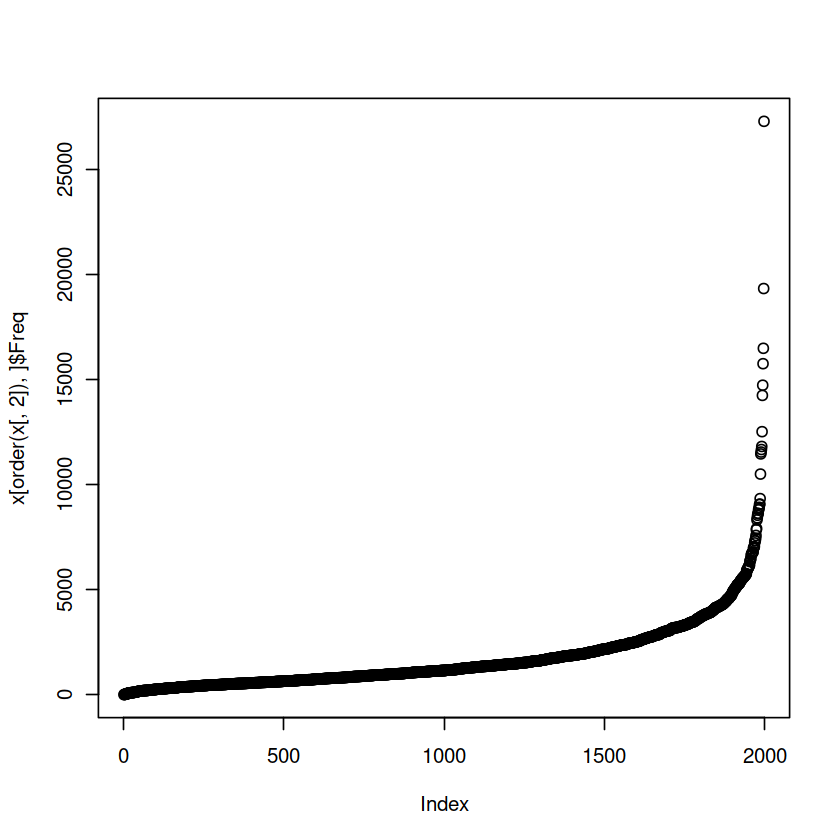

In [15]:
plot(x[order(x[,2]),]$Freq)
x[order(x[,2]),][c(1:20),]

In [8]:
  x$class <- "unassigned"
  x[grep(pattern = "A_group1", x = x$Var1), "class"] <- "A_group1"
  x[grep(pattern = "A_group2", x = x$Var1), "class"] <- "A_group2"
  x[grep(pattern = "A_group3", x = x$Var1), "class"] <- "A_group3"
  x[grep(pattern = "A_group4", x = x$Var1), "class"] <- "A_group4"
  x[grep(pattern = "B1_group1", x = x$Var1), "class"] <- "B1_group1"
  x[grep(pattern = "B1_group2", x = x$Var1), "class"] <- "B1_group2"
  x[grep(pattern = "B1_group3", x = x$Var1), "class"] <- "B1_group3"
  x[grep(pattern = "B1_group4", x = x$Var1), "class"] <- "B1_group4"
  x[grep(pattern = "B1_group5", x = x$Var1), "class"] <- "B1_group5"
  x[grep(pattern = "B2_group1", x = x$Var1), "class"] <- "B2_group1"
  x[grep(pattern = "B2_group2", x = x$Var1), "class"] <- "B2_group2"
  x[grep(pattern = "B2_group3", x = x$Var1), "class"] <- "B2_group3"
  x[grep(pattern = "C_group1", x = x$Var1), "class"] <- "C_group1"
  x[grep(pattern = "C_group2", x = x$Var1), "class"] <- "C_group2"
  x[grep(pattern = "C_group3", x = x$Var1), "class"] <- "C_group3"
  x[grep(pattern = "Neg-Control", x = x$Var1), "class"] <- "Neg-Control"
  x[grep(pattern = "Random_sequence_trial2", x = x$Var1), "class"] <- "Random_sequence_trial2"
  x[grep(pattern = "Random_sequence_trial3", x = x$Var1), "class"] <- "Random_sequence_trial3"
  x[grep(pattern = "S4_MEL", x = x$Var1), "class"] <- "S4_MEL"
  x[grep(pattern = "S4_MES", x = x$Var1), "class"] <- "S4_MES"
  x[grep(pattern = "S4_combi", x = x$Var1), "class"] <- "S4_combi"
  x[grep(pattern = "S5_MEL", x = x$Var1), "class"] <- "S5_MEL"
  x[grep(pattern = "S5_MES", x = x$Var1), "class"] <- "S5_MES"
  x[grep(pattern = "S5_combi", x = x$Var1), "class"] <- "S5_combi"

In [9]:
unique(x$class)

[1] "A_group1"               "A_group2"               "A_group3"              
 [4] "A_group4"               "B1_group1"              "B1_group2"             
 [7] "B1_group3"              "B1_group4"              "B1_group5"             
[10] "B2_group1"              "B2_group2"              "B2_group3"             
[13] "C_group1"               "C_group2"               "C_group3"              
[16] "Neg-Control"            "Random_sequence_trial2" "Random_sequence_trial3"
[19] "S4_MEL"                 "S4_MES"                 "S4_combi"              
[22] "S5_MEL"                 "S5_MES"                 "S5_combi"

In [10]:
library(ggplot2)


In [11]:
head(x)

Var1,Freq,class
<fct>,<int>,<chr>
A_group1_seq100_chr9:96385969-96386469,2227,A_group1
A_group1_seq101_chr9:140681098-140681598,270,A_group1
A_group1_seq102_chrX:3845338-3845838,447,A_group1
A_group1_seq103_chrX:9827376-9827876,1824,A_group1
A_group1_seq104_chrX:14320175-14320675,1041,A_group1
A_group1_seq105_chrX:81125209-81125709,1176,A_group1


In [ ]:
ggplot(x, aes(x=class,y=Freq))+geom_violin() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + geom_jitter(shape=16, position=position_jitter(0.2), cex = 0.2) 

## Extra. Sequencing saturarion

- First extract the rBCs from the fastq and put it in a text file
- To calculate the statureation, subsample this rBC text file (choose the subsampling frequency a bit depending on the data) and print the number of cleaned reads (i.e. rBCs) taken and the number of unqiue ones for that subsample.
    - e.g. now we have in the 03.sequencing_saturation/${line}_R1_q30.txt files a max of 20,884,696 
- You can then plot these numbers in excell in a line graph to assess the saturation

In [1]:
# Extract DNA sequences from fastq
cd /user/leuven/317/vsc31703/stg_00002/Enhancer_design/MPRA/CHEQ-seq_cloning2/E-BC_coupling/
zcat 02.TRIMMED_FQ/CSE__88dc35__CHEQseq-cl2_2000enh_3x_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz  | sed -n '2~4p' > 04.sequencing_saturation/CSE__88dc35__CHEQseq-cl2_2000enh_3x_R2.txt
zcat 02.TRIMMED_FQ/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.Q20_trimmed5-3_rBCq30_filt.fastq.gz  | sed -n '2~4p' > 04.sequencing_saturation/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.txt



In [2]:
# Count total number of rBC in files
cat 04.sequencing_saturation/CSE__88dc35__CHEQseq-cl2_2000enh_3x_R2.txt| wc -l
cat 04.sequencing_saturation/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.txt| wc -l

15495989
15470589


In [4]:
# Subsample, count total and unique reads
start=`date +%s`

file="04.sequencing_saturation/CSE__953401__CHEQseq-cl2_2000enh_1x_R2.txt"
nreads=$(cat $file | wc -l)
 # Start by removing parallel instructions file
rm 04.sequencing_saturation/parallel.txt
 # Remove any previoulsy created sat values for that file
rm ${file%_*}_sat.txt
    for i in $(seq 0 200000 $nreads)
    do
     # Print number of total and unique reads for every subsamples
    echo "echo $i \$(shuf -n $(($i)) $file | sort | uniq | wc -l) >> ${file%_*}_sat.txt" \
    >> 04.sequencing_saturation/parallel.txt
    done
cat 04.sequencing_saturation/parallel.txt | parallel -j 16
 # Put values in numerical order
cat ${file%_*}_sat.txt | sort -g > ${file%_*}_satsort.txt && mv ${file%_*}_satsort.txt ${file%_*}_sat.txt
done

end=`date +%s`
echo $((end-start))

rm: cannot remove ‘04.sequencing_saturation/CSE__953401__CHEQseq-cl2_2000enh_1x_sat.txt’: No such file or directory
bash: syntax error near unexpected token `done'
270
